In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
# from collections import Counter

import graph_tools

## Instantiate a model with parameters

In [2]:
# Network selection
# g = nx.watts_strogatz_graph(n=20, k=4, p=0.1) # p=1 -> all-to-all connectivity
g = nx.karate_club_graph()
# g = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# Dynamical Model Configuration
model = ep.SIRModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('gamma', 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)



### Network characteristics

Nodes:  34
Edges:  78
Average degree:  2.2941176470588234


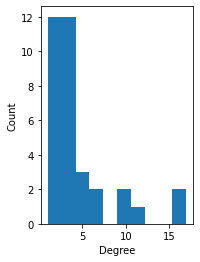

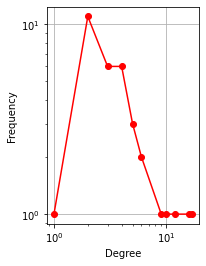

In [3]:
# Nework degree distribution
degrees, values, keys = graph_tools.degree_dist(g)

# Nework statistics
avg_deg = float(g.size()) / g.order()
print("Nodes: ", g.order())
print("Edges: ", g.size())
print("Average degree: ", avg_deg)

# Plot degree distribution
# histogram
plt.subplot(121)
plt.hist(degrees)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Frequency
plt.subplot(122)
plt.loglog(keys, values, 'ro-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Simulation execution

In [4]:
number_of_iteration = 10
iterations = model.iteration_bunch(number_of_iteration)

100%|██████████| 10/10 [00:00<00:00, 9586.98it/s]


## Visualisation

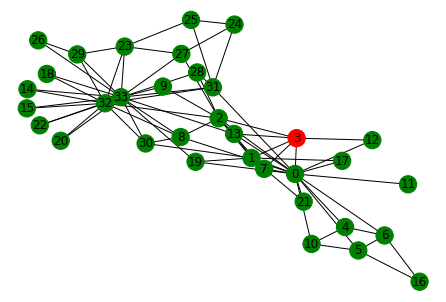

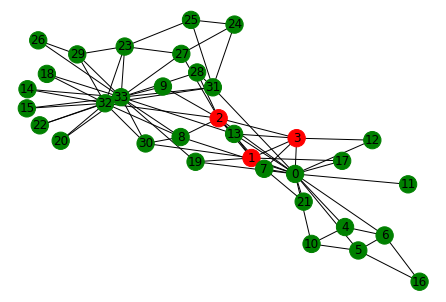

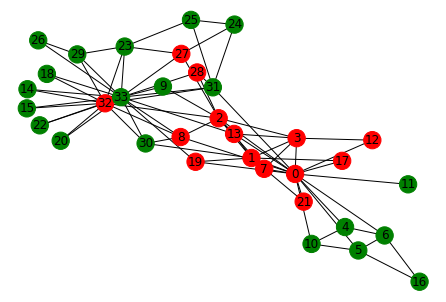

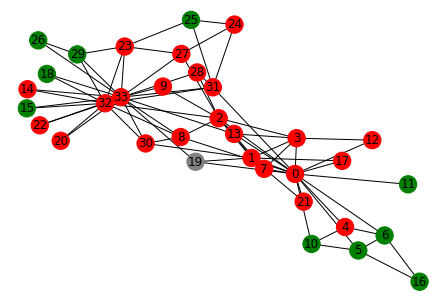

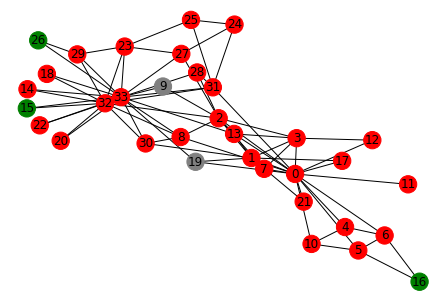

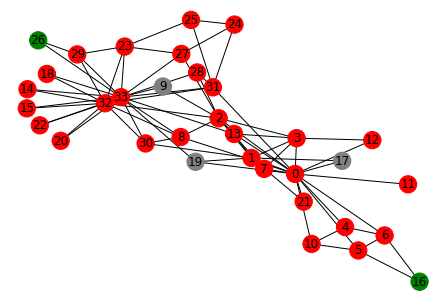

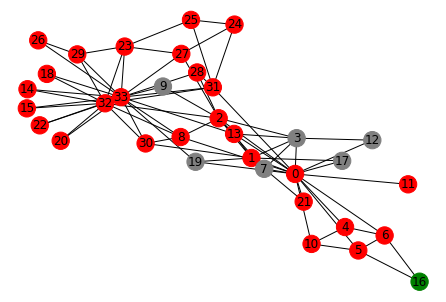

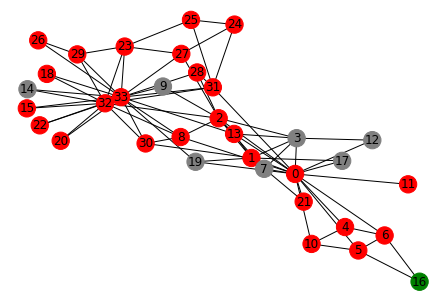

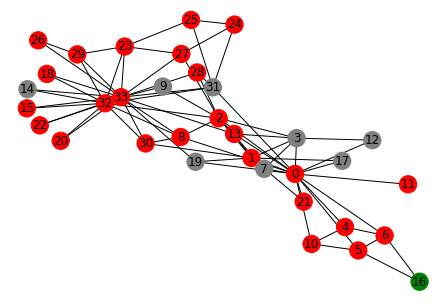

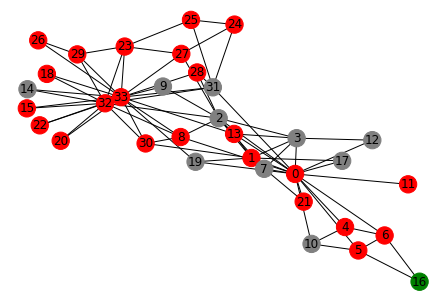

In [5]:
positions = nx.spring_layout(g)
color_map = []
for iteration in range(g.number_of_nodes()):
    color_map.append('green')

for iteration in iterations:
    for index, status in iteration['status'].items():
        if status == 1:
            color_map[index] = 'red'
        if status == 2:
            color_map[index] = 'grey'

    nx.draw(g, positions, node_color=color_map, with_labels=True)
    plt.show()